In [11]:
from headers import *
import sklearn.manifold as skl_manifold
plt.rcParams['figure.figsize'] = 14, 10

In [12]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/"
num_images = npy.load(os.path.join(FILE_DIR,"Number_Images.npy"))

In [13]:
FILE_DIR = "/home/tanmay/catkin_ws/src/Visualize_Primitives/Data/K2_Demos/Grid_Demo/D{0}"

lhseg = [[] for i in range(10)]
rhseg = [[] for i in range(10)]

lhlabel = [[] for i in range(10)]
rhlabel = [[] for i in range(10)]

for i in range(10):
#     lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_LH_Seg_Indices.npy".format(i+1)))
#     rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"D{0}_RH_Seg_Indices.npy".format(i+1)))
    lhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Seg.npy"))
    rhseg[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Seg.npy"))
    
    lhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"LH_Label.npy"))
    rhlabel[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"RH_Label.npy"))

action_list = npy.array(['Null','Reach','Place','Return','Pour'])

In [14]:
hc3 = [[] for i in range(10)]
lh = [[] for i in range(10)]
rh = [[] for i in range(10)]
# lhs = [[] for i in range(10)]
# rhs = [[] for i in range(10)]

for i in range(10):
    hc3[i] = npy.load(os.path.join(FILE_DIR.format(i+1),"Hand_Coordinates_3D.npy"))
    lh[i] = hc3[i][:,0,:]
    rh[i] = hc3[i][:,2,:]

In [15]:
numlhseg = 0
numrhseg = 0
for i in range(10):
    numlhseg += len(lhseg[i])-1
    numrhseg += len(rhseg[i])-1
numlhseg,numrhseg

(64, 63)

In [16]:
lhpos = [[] for i in range(numlhseg)]
rhpos = [[] for i in range(numrhseg)]

lhlabel_list = [[] for i in range(numlhseg)]
rhlabel_list = [[] for i in range(numrhseg)]

ctr = 0
for i in range(10):
    for j in range(len(lhseg[i])-1):
        print(ctr,i,lhseg[i][j],lhseg[i][j+1])
        lhpos[ctr] = lh[i][lhseg[i][j]:lhseg[i][j+1]]
        
        lhlabel_list[ctr] = lhlabel[i][j]
        ctr +=1
ctr = 0
for i in range(10):
    for j in range(len(rhseg[i])-1):
        rhpos[ctr] = rh[i][rhseg[i][j]:rhseg[i][j+1]]
        rhlabel_list[ctr] = rhlabel[i][j]
        ctr +=1 
        

(0, 0, 0, 21)
(1, 0, 21, 37)
(2, 0, 37, 62)
(3, 0, 62, 85)
(4, 0, 85, 168)
(5, 0, 168, 182)
(6, 0, 182, 211)
(7, 0, 211, 235)
(8, 1, 0, 65)
(9, 1, 65, 88)
(10, 1, 88, 119)
(11, 1, 119, 145)
(12, 1, 145, 240)
(13, 1, 240, 247)
(14, 1, 247, 264)
(15, 1, 264, 290)
(16, 2, 0, 189)
(17, 2, 189, 204)
(18, 2, 204, 225)
(19, 2, 225, 250)
(20, 3, 0, 101)
(21, 3, 101, 121)
(22, 3, 121, 159)
(23, 3, 159, 174)
(24, 3, 174, 240)
(25, 4, 0, 165)
(26, 4, 165, 182)
(27, 4, 182, 202)
(28, 4, 202, 220)
(29, 5, 0, 170)
(30, 5, 170, 184)
(31, 5, 184, 205)
(32, 5, 205, 225)
(33, 6, 0, 35)
(34, 6, 35, 45)
(35, 6, 45, 63)
(36, 6, 63, 78)
(37, 6, 78, 148)
(38, 6, 148, 160)
(39, 6, 160, 185)
(40, 6, 185, 200)
(41, 7, 0, 95)
(42, 7, 95, 113)
(43, 7, 113, 132)
(44, 7, 132, 148)
(45, 7, 148, 164)
(46, 7, 164, 230)
(47, 7, 230, 250)
(48, 8, 0, 20)
(49, 8, 20, 35)
(50, 8, 35, 56)
(51, 8, 56, 70)
(52, 8, 70, 170)
(53, 8, 170, 186)
(54, 8, 186, 209)
(55, 8, 209, 230)
(56, 9, 0, 23)
(57, 9, 23, 39)
(58, 9, 39, 67)
(59

In [17]:
rolltime = 100
lhdmp = [DMP(rolltime) for i in range(numlhseg)]
rhdmp = [DMP(rolltime) for i in range(numrhseg)]

for i in range(numlhseg):
    print(i)
    lhdmp[i].linear_interpolate(lhpos[i])
    lhdmp[i].initialize_variables()
    lhdmp[i].learn_DMP()

for i in range(numrhseg):
    print(i)
    rhdmp[i].linear_interpolate(rhpos[i])
    rhdmp[i].initialize_variables()
    rhdmp[i].learn_DMP()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62


In [18]:
nk = lhdmp[0].number_kernels
lhmetaw = npy.zeros((numlhseg,nk,3))
rhmetaw = npy.zeros((numrhseg,nk,3))

for i in range(numlhseg):
    lhmetaw[i] = lhdmp[i].weights
for i in range(numrhseg):
    rhmetaw[i] = rhdmp[i].weights

In [19]:
lhmetaw = lhmetaw.reshape(numlhseg,3*nk)
rhmetaw = rhmetaw.reshape(numrhseg,3*nk)

lhnotnan = []
rhnotnan = []

for i in range(numlhseg):
    if not(npy.isnan(lhmetaw[i]).any()):
        lhnotnan.append(i)
    
for i in range(numrhseg):
    if not(npy.isnan(rhmetaw[i]).any()):
        rhnotnan.append(i)
# lhnotnan = npy.where(npy.isfinite(lhmetaw))[0]
# rhnotnan = npy.where(npy.isfinite(rhmetaw))[0]
# len(rhnotnan)
len(lhnotnan),len(rhnotnan),lhmetaw.shape, rhmetaw.shape,len(lhlabel_list)

(63, 63, (64, 300), (63, 300), 64)

In [20]:
lhlabel_list = npy.array(lhlabel_list)
rhlabel_list = npy.array(rhlabel_list)

In [21]:
lhmetaw = lhmetaw[lhnotnan]
lhlabel_list = lhlabel_list[lhnotnan]
# rhmetaw = rhmetaw[rhnotnan]
len(lhlabel_list)

63

In [22]:
npy.where(lhlabel_list), len(npy.where(lhlabel_list)[0])

((array([ 1,  2,  3,  5,  6,  7,  9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22,
         23, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 41, 42, 43, 44,
         45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61, 62]),), 48)

In [23]:
lhmetaw = lhmetaw[npy.where(lhlabel_list)[0]]
rhmetaw = rhmetaw[npy.where(rhlabel_list)[0]]

In [24]:
lhmetaw.shape, rhmetaw.shape

((48, 300), (42, 300))

In [25]:
num_cluster = 12

# lhmetaw = lhmetaw.reshape(numlhseg-1,3*nk)
kmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(lhmetaw)
model = skl_manifold.TSNE(n_components=2,random_state=0)
lhew = model.fit_transform(lhmetaw)

In [26]:
kmeans.labels_

array([ 9,  6,  9,  9,  9,  9,  9,  8,  0,  9,  9,  9,  9,  9,  0,  9,  0,
        0,  0,  2,  0,  0,  5,  9,  9,  4,  0, 11,  7,  0,  0,  9,  9,  0,
        1,  0,  9,  9,  9,  9, 10,  9,  9,  3,  9,  9,  9,  9], dtype=int32)

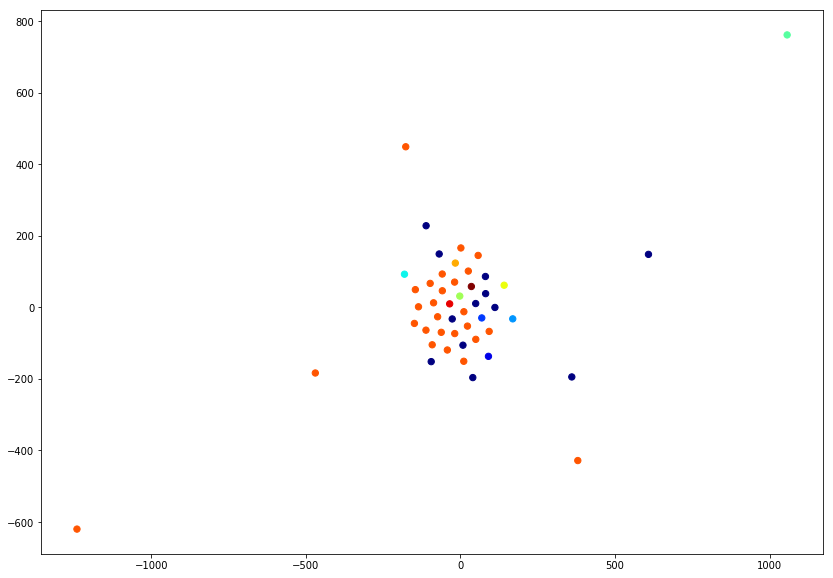

In [27]:
fig,ax = plt.subplots()
ax.scatter(lhew[:,0],lhew[:,1],c=kmeans.labels_,s=40,cmap='jet')
plt.show()

In [44]:
num_cluster = 10

# rhmetaw = rhmetaw[rhnotnan]
# rhmetaw = rhmetaw.reshape(numrhseg-1,3*nk)
rhkmeans = KMeans(n_clusters = num_cluster,random_state=0).fit(rhmetaw)
rhmodel = skl_manifold.TSNE(n_components=2,random_state=0)
rhew = rhmodel.fit_transform(rhmetaw)

In [45]:
rhkmeans.labels_

array([0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 5, 0, 0, 6, 0, 0, 1,
       0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 3, 0], dtype=int32)

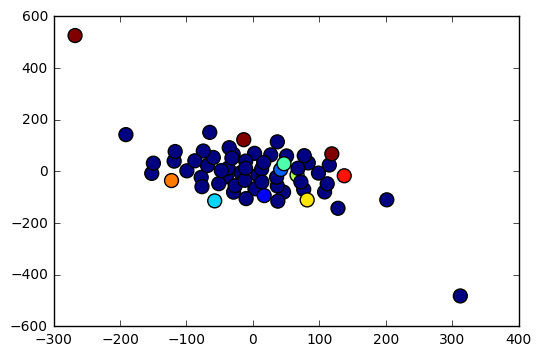

In [15]:
fig,ax = plt.subplots()
ax.scatter(rhew[:,0],rhew[:,1],c=rhkmeans.labels_,s=100)
plt.show()

In [17]:
# consider_seg = 9
# fig1 = plt.figure()
# ax1 = fig1.gca(projection='3d')
# for i in range(numlhseg-1):
#     if kmeans.labels_[i]==consider_seg:
#         ax1.plot(lhpos[lhnotnan[i]][:,0],lhpos[lhnotnan[i]][:,1],lhpos[lhnotnan[i]][:,2])
# plt.show()

In [29]:
nonan_lhlabel = [[] for i in range(len(lhnotnan))]
for i in range(len(lhnotnan)):
    nonan_lhlabel[i] = lhlabel_list[lhnotnan[i]]
nonan_lhlabel

[0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 1,
 4,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3,
 0,
 1,
 2,
 3]

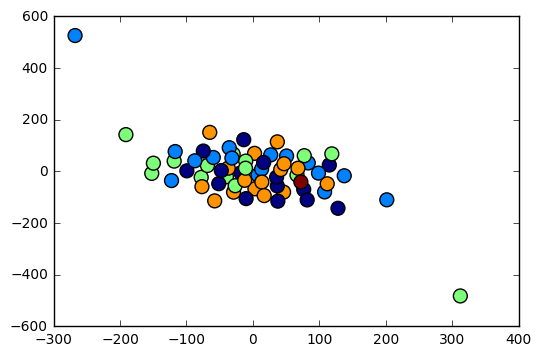

In [25]:
fig,ax = plt.subplots()
ax.scatter(rhew[:,0],rhew[:,1],c=nonan_lhlabel,s=100)
plt.show()

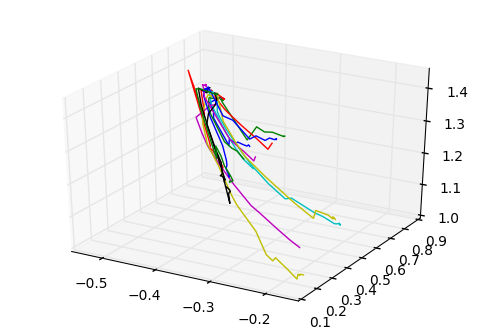

In [30]:
consider_lab = 1
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')
for i in range(numlhseg-1):
    if nonan_lhlabel[i]==consider_lab:
        ax1.plot(lhpos[lhnotnan[i]][:,0],lhpos[lhnotnan[i]][:,1],lhpos[lhnotnan[i]][:,2])
#         ax1.plot(lhpos[nonan_lhlabel[i]][:,0],lhpos[nonan_lhlabel[i]][:,1],lhpos[nonan_lhlabel[i]][:,2])
        
plt.show()